In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()
#dropping nulls after interpolation

education_df.dropna(inplace=True)

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?


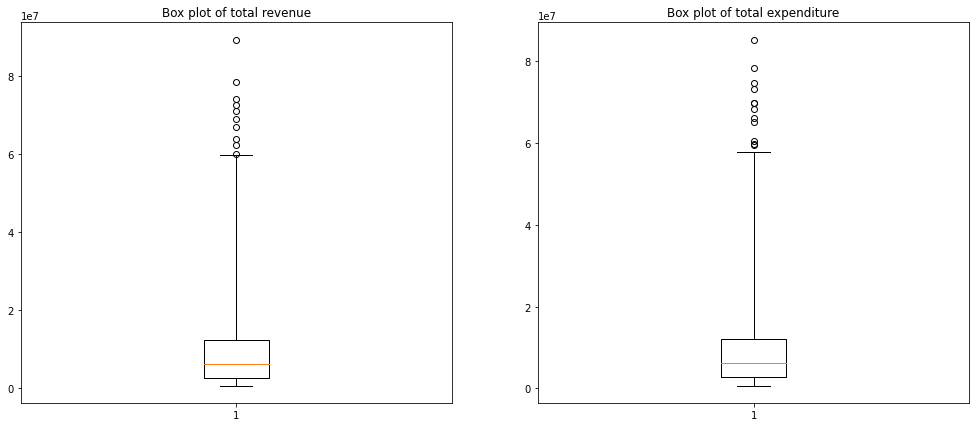

In [4]:
plt.figure(figsize = (17, 7))

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()

yes, they have outliers, which go over 8

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values afterwards you handled them

In [5]:
#let use the winsorize to eliminate the outliers.

from scipy.stats.mstats import winsorize

wins_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

wins_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

In [6]:
#check for the outliers if they're eliminated or not

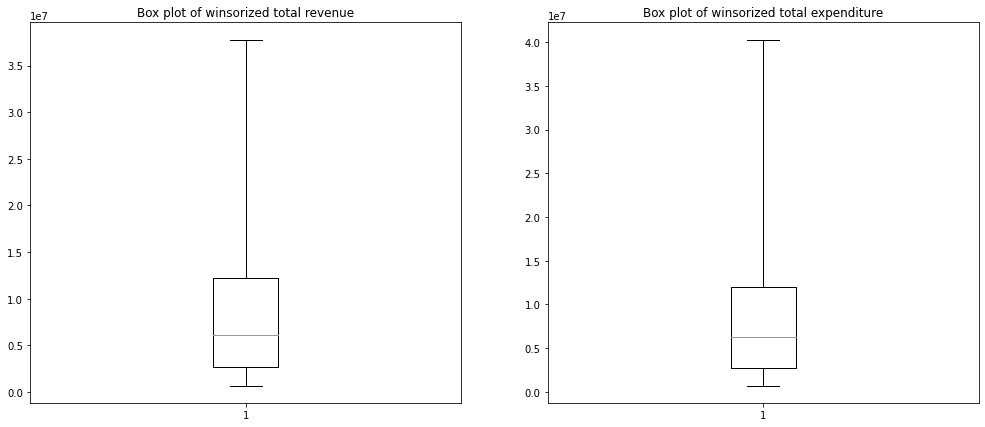

In [8]:
plt.figure(figsize = (17,7))

plt.subplot(1,2,1)
plt.boxplot(wins_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(wins_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable

In [9]:
budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE


Text(0.5, 1.0, 'Box plot of budget deficit')

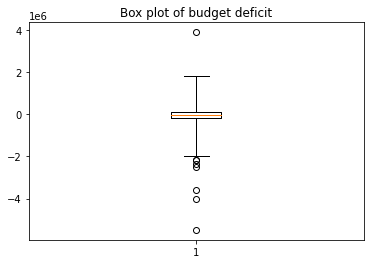

In [13]:
plt.boxplot(budget_deficit, whis = 6)
plt.title("Box plot of budget deficit")

In [14]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))


Text(0.5, 1.0, 'Box plot of budget deficit')

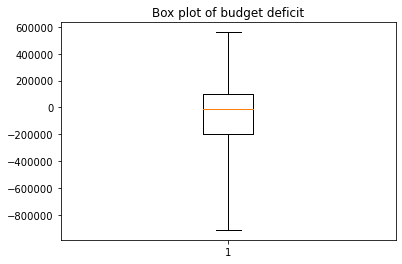

In [16]:

plt.boxplot(winsorized_budget, whis = 6)
plt.title("Box plot of budget deficit")

In [17]:
#no outliers

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. But this time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them

In [19]:
budget_deficit2 = wins_revenue - wins_expenditure

Text(0.5, 1.0, 'Box plot of budget deficit 2')

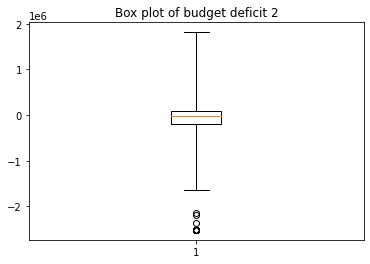

In [20]:
plt.boxplot(budget_deficit2, whis = 6)
plt.title("Box plot of budget deficit 2")

we have negative outliers, lets drop them

In [21]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))


Text(0.5, 1.0, 'Box plot of budget deficit 2')

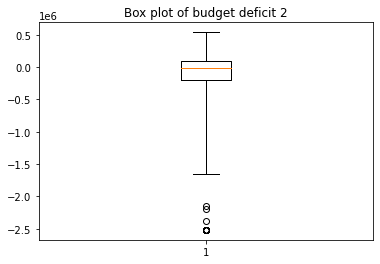

In [23]:
plt.boxplot(winsorized_budget2, whis = 5)
plt.title("Box plot of budget deficit 2")

still negative outliers left, if to increase the lower bound of the wins, the remaining should be eliminated too.

5. Compare some basic statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [24]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.094882e+04,-58733.012876,-1.720532e+05
std,6.144222e+05,341300.816505,6.509561e+05
min,-5.487742e+06,-913765.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-8.872500e+03,-8872.500000,-1.282350e+04
75%,1.013948e+05,101394.750000,9.826300e+04
max,3.897129e+06,560511.000000,5.400550e+05


mean, max, min of two columns: wins_bud1, wins_bud2 are very different. Getting rid of the outliers
    make a big difference in the end of the result. 

6. If our variable of interest is the budget deficit variable, which method do you think is the most appropriate one in dealing with the outliers in this variable. The method in the third question or the one in the fourth question?

3rd is the most effective here. We create the var then we get rid of outliers and can see the differences between two.